# 다차원 텐서 (다차원 배열)

In [7]:
import numpy as np

### 다차원 배열의 계산 복습

In [8]:
A = np.array([[1, 2, 3], 
              [4, 5, 6]])
B = np.array([[7, 8, 9], 
              [10, 11, 12]])

add_result = A + B

vec = np.array([1, 2, 3])
add_result2 = A + vec   # 브로드캐스팅

print(add_result)
print(add_result2)

dot_result = A.dot(B.T)
print(dot_result)

[[ 8 10 12]
 [14 16 18]]
[[2 4 6]
 [5 7 9]]
[[ 50  68]
 [122 167]]


### 다차원 배열의 계산으로 순전파 구현

In [9]:
# 입력 데이터
X = np.random.randn(4, 5)   # 4개의 샘플, 5차원 feature

# 가중치
W = np.random.randn(5, 3)   # 5개의 입력(feature), 3개의 뉴런으로 구성된 레이어

# 편향
b = np.random.randn(1, 3)

# 선형 계산 (W*X + b)
z = np.dot(X, W) + b

# ReLU 활성화 함수
result = np.maximum(0, z)

print(result)

[[1.26728295 0.         0.        ]
 [1.24187837 0.         0.        ]
 [1.80038569 0.         0.        ]
 [3.14619999 0.87362857 2.99377446]]


### 다층 퍼셉트론

In [10]:
X = np.random.randn(6, 10)

# 은닉층 : 10개의 입력 -> 8개의 뉴런
w1 = np.random.randn(10, 8) 
b1 = np.random.randn(1, 8)

# 출력층 : 8개의 입력 -> 4개의 클래스
w2 = np.random.randn(8, 4) 
b2 = np.random.randn(1, 4)

# 은닉층 계산 (선형 계산 + tanh 활성화 함수)
z1 = np.dot(X, w1) + b1
result1 = np.tanh(z1)

# 출력층 계산 (선형 계산 + softmax 활성화 함수)
z2 = np.dot(result1, w2) + b2
exp_z = np.exp(z2 - np.max(z2, axis=1, keepdims=True))
result2 = exp_z / np.sum(exp_z, axis=1, keepdims=True)

print(result2)

[[9.23933099e-02 6.91322972e-01 1.67233979e-01 4.90497390e-02]
 [5.64545250e-03 7.24680356e-01 2.52040083e-01 1.76341087e-02]
 [1.48015787e-02 9.67494213e-01 4.02810383e-04 1.73013980e-02]
 [5.13113026e-01 2.49536334e-02 1.55564592e-02 4.46376881e-01]
 [4.29834029e-03 9.70641873e-01 1.32253540e-02 1.18344326e-02]
 [3.61210327e-05 4.07664214e-01 1.51149326e-02 5.77184732e-01]]


### 이미지 데이터 예시

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

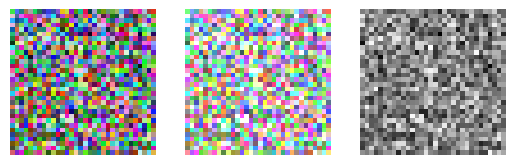

In [13]:
import matplotlib.pyplot as plt

# 이미지 생성
batch_size = 5
channels = 3
height = 32
width = 32

images = np.random.rand(batch_size, channels, height, width)

bright_images = np.clip(images + 0.2, 0, 1)

gray_images = np.mean(images, axis=1)

# PyTorch 프레임워크에서는 이미지 데이터를 (채널, 높이, 너비) 순서로 저장
# matplotlib.pyplot.imshow()는 (높이, 너비, 채널) 순서로 기대
# 따라서 transpose()를 이용해 축의 순서를 재배열
images_for_display = images[0].transpose(1, 2, 0)
bright_images_display = bright_images[0].transpose(1, 2, 0)

plt.subplot(1, 3, 1)
plt.imshow(images_for_display)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bright_images_display)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_images[0], cmap='gray')
plt.axis('off')